In [327]:
import pandas as pd

# Import cleaned 2019 dataset to verify outliers have been removed
df_no_outliers = pd.read_csv("datasets/cleaned/cleaned_dataset_2019.csv")

In [328]:
from ydata_profiling import ProfileReport

# YData Profiling of filtered dataset to confirm sufficient outliers removed to decrease skewness
profile = ProfileReport(df_no_outliers, title="Cleaned Profile")
profile.to_file('eda_reports/cleaned/cleaned_data_report_2019.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 312.19it/s]


In [308]:
# Replace long values that may be hard to read in visualisations
df_no_outliers["EdLevel"].replace("I never completed any formal education", "No formal education", inplace=True)
df_no_outliers["EdLevel"].replace("Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", "Secondary school", inplace=True)
df_no_outliers["EdLevel"].replace("Some college/university study without earning a degree", "College/University (Incomplete)", inplace=True)
df_no_outliers["EdLevel"].replace("Bachelor’s degree (BA, BS, B.Eng., etc.)", "Bachelor's degree", inplace=True)
df_no_outliers["EdLevel"].replace("Master’s degree (MA, MS, M.Eng., MBA, etc.)", "Master's degree", inplace=True)
df_no_outliers["EdLevel"].replace("Professional degree (JD, MD, etc.)", "Professional degree", inplace=True)
df_no_outliers["EdLevel"].replace("Other doctoral degree (Ph.D, Ed.D., etc.)", "Doctoral degree", inplace=True)

/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/3464570330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["EdLevel"].replace("I never completed any formal education", "No formal education", inplace=True)
/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/3464570330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["EdLevel"].replace("Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", "Secondary school", inplace=True)
/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/3464570330.py:4: SettingWith

In [309]:
# Associate an order with the ordinal variables

# EdLevel
order_ed_level = ["No formal education",
                  "Primary/elementary school",
                  "Secondary school",
                  "Associate degree",
                  "College/University (Incomplete)",
                  "Bachelor's degree",
                  "Master's degree",
                  "Professional degree",
                  "Doctoral degree"]

df_no_outliers["EdLevel"] = pd.Categorical(df_no_outliers["EdLevel"], categories=order_ed_level, ordered=True)

/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/3504537172.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["EdLevel"] = pd.Categorical(df_2019_no_outliers["EdLevel"], categories=order_ed_level, ordered=True)


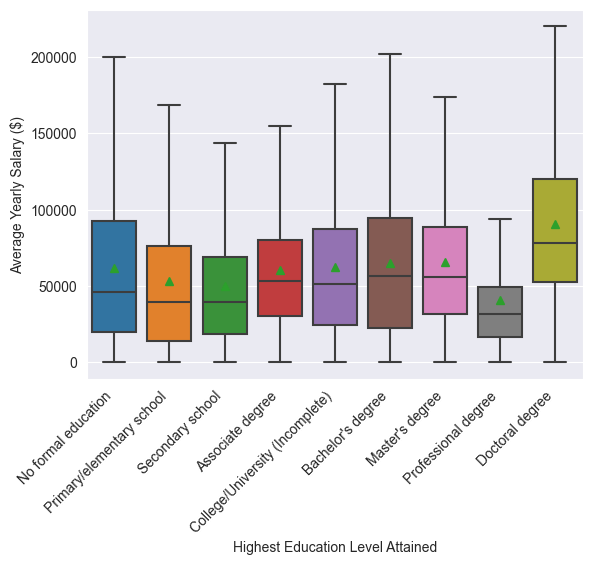

In [318]:
import seaborn as sns
from matplotlib import pyplot

box_plot_1 = sns.boxplot(df_no_outliers, x="EdLevel", y=convertedcomp_variable_name, showmeans=True, sym="")
box_plot_1.set_xlabel("Highest Education Level Attained")
box_plot_1.set_ylabel("Average Yearly Salary ($)")
box_plot_1.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_1.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_1 = box_plot_1.get_figure()
figure_1.savefig("figures/" + year + "/cleaned/cleaned_edlevel_convertedcomp-boxplot.png", bbox_inches="tight")

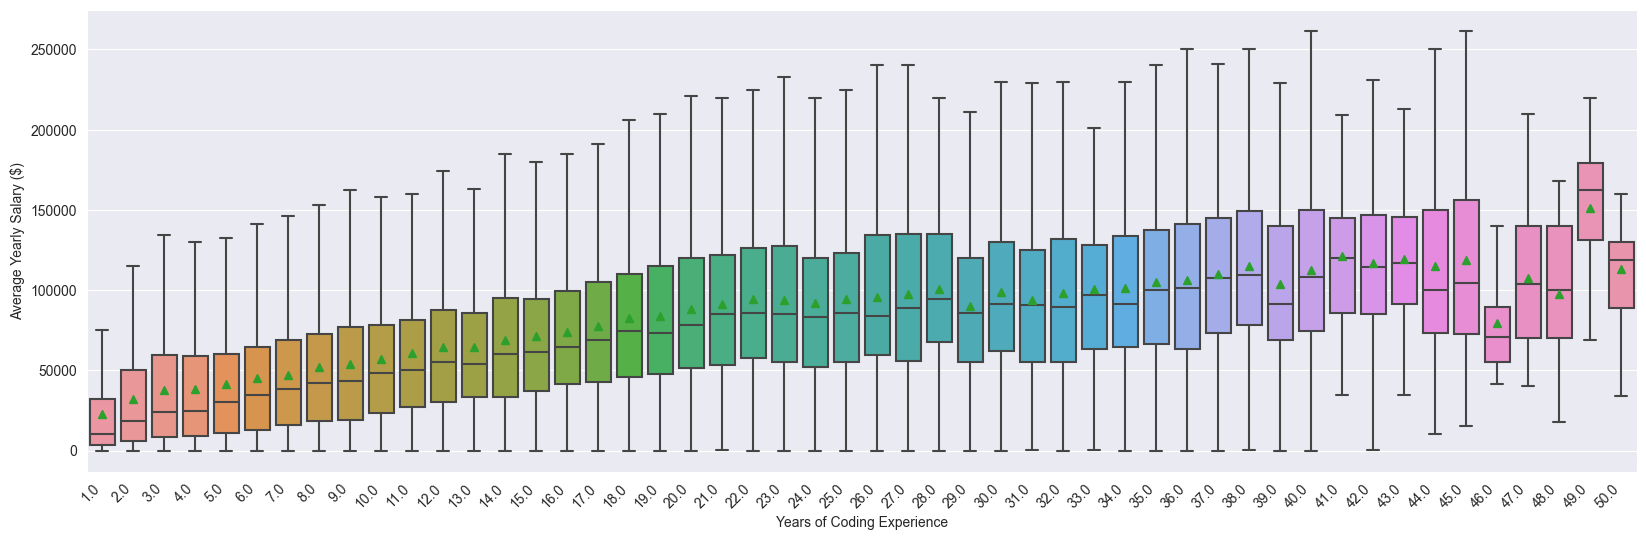

In [320]:
pyplot.figure(figsize=(20, 6))
box_plot_2 = sns.boxplot(df_no_outliers, x="YearsCode", y=convertedcomp_variable_name, showmeans=True, sym="")
box_plot_2.set_xlabel("Years of Coding Experience")
box_plot_2.set_ylabel("Average Yearly Salary ($)")
box_plot_2.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_2.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_2 = box_plot_2.get_figure()
figure_2.savefig("figures/" + year + "/cleaned/cleaned_yearscode_convertedcomp-boxplot.png", bbox_inches="tight")

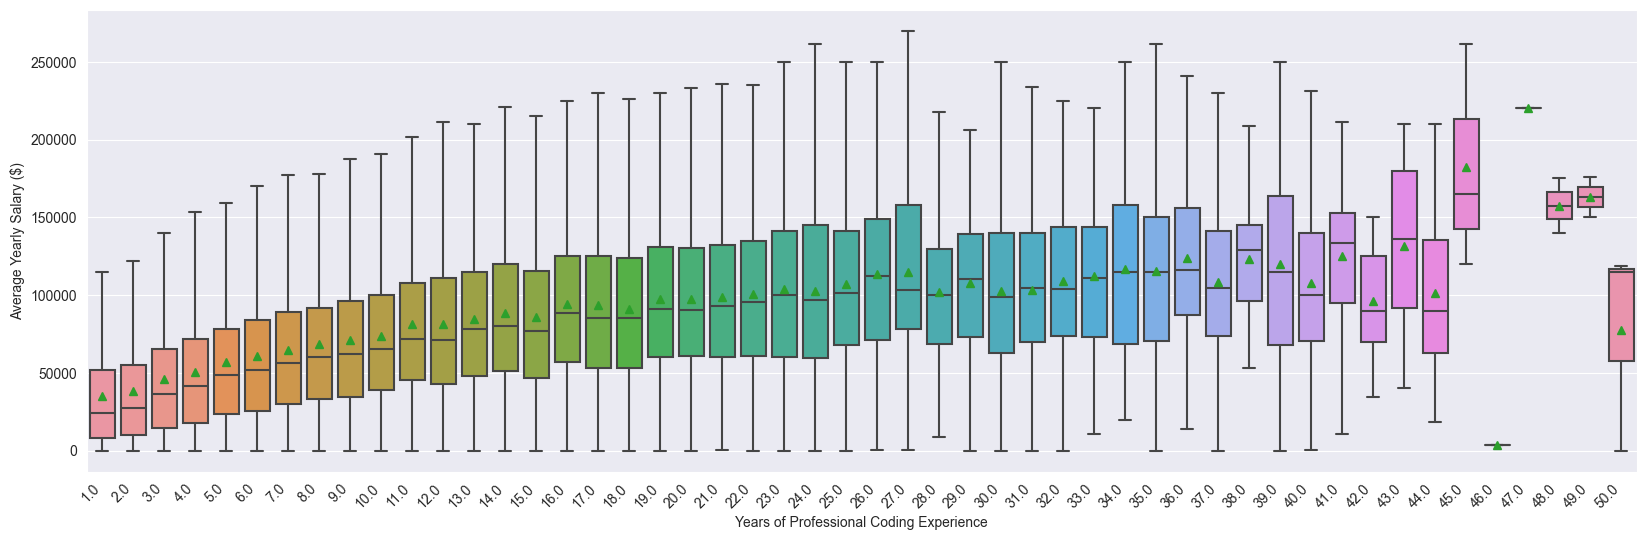

In [321]:
pyplot.figure(figsize=(20, 6))
box_plot_3 = sns.boxplot(df_no_outliers, x="YearsCodePro", y=convertedcomp_variable_name, showmeans=True, sym="")
box_plot_3.set_xlabel("Years of Professional Coding Experience")
box_plot_3.set_ylabel("Average Yearly Salary ($)")
box_plot_3.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_3.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_3 = box_plot_3.get_figure()
figure_3.savefig("figures/" + year + "/cleaned/cleaned_yearscodepro_convertedcomp-boxplot.png", bbox_inches="tight")

In [313]:
# Replace long value that might be hard to read in visualisation
df_no_outliers["OrgSize"].replace("Just me - I am a freelancer, sole proprietor, etc.", "Freelancer", inplace=True)

# Assign an order to the OrgSize column
order_org_size = ["Freelancer",
                  "2-9 employees",
                  "10 to 19 employees",
                  "20 to 99 employees",
                  "100 to 499 employees",
                  "500 to 999 employees",
                  "1,000 to 4,999 employees",
                  "5,000 to 9,999 employees",
                  "10,000 or more employees"]

df_no_outliers["OrgSize"] = pd.Categorical(df_no_outliers["OrgSize"], categories=order_org_size, ordered=True)

/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/799264007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["OrgSize"].replace("Just me - I am a freelancer, sole proprietor, etc.", "Freelancer", inplace=True)
/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/799264007.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["OrgSize"] = pd.Categorical(df_2019_no_outliers["OrgSize"], categories=order_org_size, ordered=True)


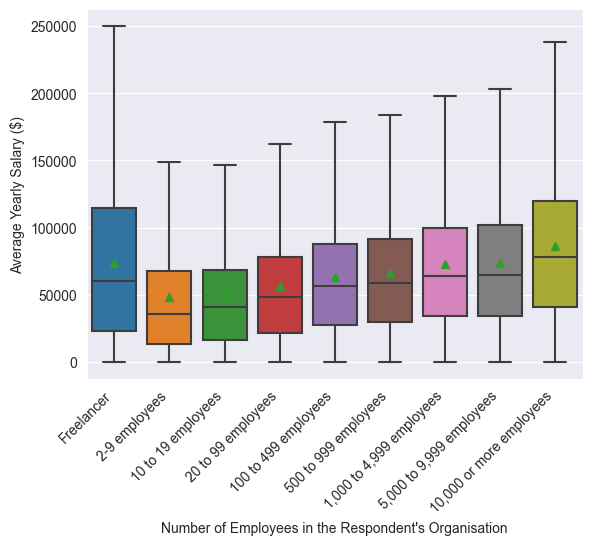

In [323]:
box_plot_4 = sns.boxplot(df_no_outliers, x="OrgSize", y=convertedcomp_variable_name, showmeans=True, sym="")
box_plot_4.set_xlabel("Number of Employees in the Respondent's Organisation")
box_plot_4.set_ylabel("Average Yearly Salary ($)")
box_plot_4.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_4.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_4 = box_plot_4.get_figure()
figure_4.savefig("figures/" + year + "/cleaned/cleaned_orgsize_convertedcomp-boxplot.png", bbox_inches="tight")

In [315]:
# Replace long values that might be hard to read in visualisation
df_no_outliers["WorkRemote"].replace("Less than once per month / Never", "Less than once per month", inplace=True)
df_no_outliers["WorkRemote"].replace("Less than half the time, but at least one day each week", "At least once per week", inplace=True)
df_no_outliers["WorkRemote"].replace("More than half, but not all, the time", "More than half of the time", inplace=True)
df_no_outliers["WorkRemote"].replace("All or almost all the time (I'm full-time remote)", "Full-time remote", inplace=True)

# Assign an order to the WorkRemote column
order_workremote = ["It's complicated",
                    "Less than once per month",
                    "A few days each month",
                    "At least once per week",
                    "About half the time",
                    "More than half of the time",
                    "Full-time remote"]

df_no_outliers["WorkRemote"] = pd.Categorical(df_no_outliers["WorkRemote"], categories=order_workremote, ordered=True)

/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/1133329399.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["WorkRemote"].replace("Less than once per month / Never", "Less than once per month", inplace=True)
/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/1133329399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019_no_outliers["WorkRemote"].replace("Less than half the time, but at least one day each week", "At least once per week", inplace=True)
/var/folders/wh/jw127_r51xzdlpjwn2bq65z80000gn/T/ipykernel_18607/1133329399.py:4: SettingWithCopyWarning: 
A 

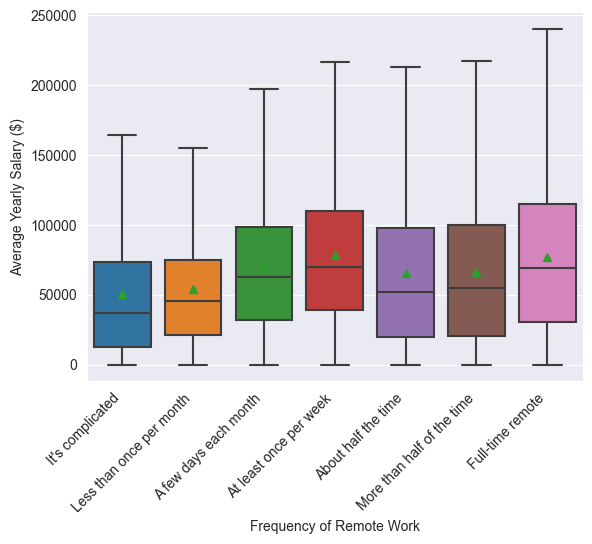

In [325]:
box_plot_5 = sns.boxplot(df_no_outliers, x="WorkRemote", y=convertedcomp_variable_name, showmeans=True, sym="")
box_plot_5.set_xlabel("Frequency of Remote Work")
box_plot_5.set_ylabel("Average Yearly Salary ($)")
box_plot_5.set_xticklabels(pyplot.xticks()[1], rotation=45, horizontalalignment="right")
box_plot_5.ticklabel_format(style='plain', axis='y', useOffset=False)

figure_5 = box_plot_5.get_figure()
figure_5.savefig("figures/" + year + "/cleaned/cleaned_workremote_convertedcomp-boxplot.png", bbox_inches="tight")